In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy.optimize import minimize, Bounds
import math
import matplotlib.pyplot as plt

# Read CSV files into DataFrames

t1 = pd.read_csv('/content/drive/MyDrive/555 Optimization/VAH01.csv')
t2 = pd.read_csv('/content/drive/MyDrive/555 Optimization/VAH17.csv')
t3 = pd.read_csv('/content/drive/MyDrive/555 Optimization/VAH27.csv')

# Concatenate DataFrames
t = pd.concat([t1, t2, t3], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/555 Optimization/VAH01.csv'

In [ ]:
# Fit linear model
formula = 'Temperature__C ~ Ecell_V + I_mA + np.power(Ecell_V, 2) + np.power(I_mA, 2) + \
          EnergyCharge_W_h + np.power(EnergyCharge_W_h, 2) + QCharge_mA_h + np.power(QCharge_mA_h, 2) + \
          EnergyDischarge_W_h + np.power(EnergyDischarge_W_h, 2) + QDischarge_mA_h + np.power(QDischarge_mA_h, 2)'

model = ols(formula, data=t).fit()

# Make a prediction
cell_data = pd.DataFrame([{
    'Ecell_V': 4.2, 'I_mA': 25, 'EnergyCharge_W_h': 86.5,
    'QCharge_mA_h': 2, 'EnergyDischarge_W_h': 0, 'QDischarge_mA_h': 0
}])
Tcell = model.predict(cell_data)[0]
print(Tcell)
# Objective function
def heat(L):
    k = [0.9, 237]
    h = 0.080
    Lcell = 0.023
    Tout = 21 + 273
    Tc = Tcell + 273
    rad = np.deg2rad(L[2])
    Q = (-Tc + Tout) / (Lcell / (k[0] * ((rad/np.pi)*Lcell*2*h)) + 2 * (L[0] / (k[1] * (h*2*Lcell*np.sin(rad/2))) + 1 / (L[3] * (h*2*Lcell*np.sin(rad/2)))))
    return Q

# Constraint function
def cons(L):
    cell_num = 900
    Cell_height = 0.08
    Cell_dist = 0.048
    cell_rad = 0.023

    c1 = (((2*L[0] + L[1])*Cell_dist*Cell_height) - (0.5*(cell_rad*np.cos(L[2]/2))*(2*cell_rad*np.sin(L[2]/2))*Cell_height))*cell_num - 0.04
    c2 = 2*L[0]+L[1] - 0.0045
    return [c1, c2]

# Constraints for minimize
constraints = [{'type': 'ineq', 'fun': lambda L: -cons(L)[0]},
               {'type': 'ineq', 'fun': lambda L: -cons(L)[1]}]

# Initial guess and bounds
x0 = [0.0015, 0.003, 2.0944, 3.08e8]
bounds = Bounds([0.001, 0.002, 0.5, 1.24e8], [0.0015, 0.003, 1.13446, 3.08e8])

# Solve the optimization problem
result = minimize(heat, x0, method='SLSQP', bounds=bounds, constraints=constraints)

print('Optimization Result:', result)


137.9603130376888
Optimization Result:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.1061271096860057
       x: [ 1.000e-03  2.500e-03  1.134e+00  3.080e+08]
     nit: 2
     jac: [ 2.231e-02  0.000e+00 -9.355e-02 -5.745e-17]
    nfev: 10
    njev: 2


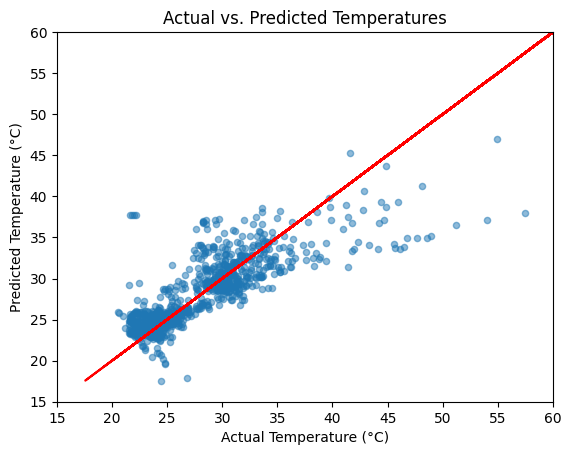

In [ ]:
t['Predicted_Temperature__C'] = model.predict(t)
fig, ax = plt.subplots()
t.sample(n=1000).plot(kind='scatter', x='Temperature__C', y='Predicted_Temperature__C', alpha=0.5, ax=ax)
ax.plot(t['Temperature__C'], t['Temperature__C'], color='red')  # Line for perfect predictions
ax.set_title('Actual vs. Predicted Temperatures')
ax.set_xlabel('Actual Temperature (°C)')
ax.set_ylabel('Predicted Temperature (°C)')
ax.set_xlim(15, 60)
ax.set_ylim(15, 60)
plt.show()

In [ ]:
alpha = np.rad2deg(2.094)
print(alpha)

119.97736230039438
